In this notebook, we will try to understand why do we need activation functions in neural networks.
We will use toy data for an experimental purposes. But the underlying concept hopefuly will be clear after running 
this notebook. As usual let's start with import statements. We will use **sklearn's datasets** module for creating toy data. I won't go into too much detail about creating the network etc. And one last reminder, i used ReLU activation function for the experiment, but you can use others as well like tanh or leaky relu.

See [activation functions](https://github.com/snnclsr/neural_nets_from_scratch/blob/master/activation_functions.ipynb) 

In [1]:
import numpy as np

from sklearn.datasets import make_moons, make_classification, make_circles, make_blobs
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from layers import Dense, Dropout
from nn import NeuralNet
from activations import ReLU
from losses import Softmax
from optimizers import SGD

from plots import plot_decision_boundary

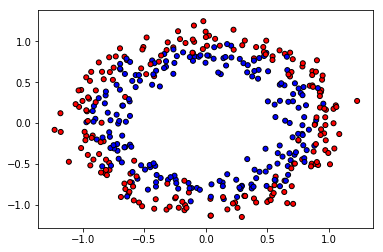

In [2]:
X, y = make_circles(n_samples=400, noise=0.1)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_data(X, y, s=25):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_bold, s=s)

plot_data(X, y)

In [3]:
lr = 0.1
n_iter = 1000
print_verbose = 100

m, n = X.shape
num_classes = 2

loss = Softmax()
optimizer = SGD(lr)

model = NeuralNet(loss, optimizer)

In [4]:
model.add(Dense(n, 16))
model.add(Dense(16, 32))
model.add(Dense(32, num_classes))

Iteration : 0, Loss : 0.699756383394688
Iteration : 100, Loss : 0.6966065477900862
Iteration : 200, Loss : 0.6956516776874976
Iteration : 300, Loss : 0.6951586544327846
Iteration : 400, Loss : 0.6948704869021584
Iteration : 500, Loss : 0.6946901655951087
Iteration : 600, Loss : 0.694571856359434
Iteration : 700, Loss : 0.6944912139258346
Iteration : 800, Loss : 0.694434376556037
Iteration : 900, Loss : 0.6943930778179487


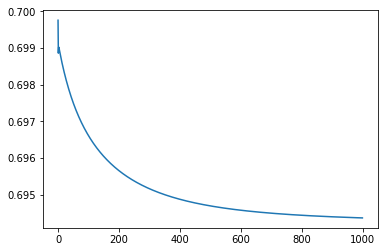

In [5]:
losses = model.train(X, y, n_iter=n_iter, print_verbose=print_verbose)
plt.plot(np.arange(n_iter), losses);

In [6]:
preds = model.predict(X)
(preds == y).mean()

0.4275

Without any non-linear activation function we can not learn the non-linear data. As you can see, our network couldn't learn anything about the data. Don't forget that the baseline for this data is %50.

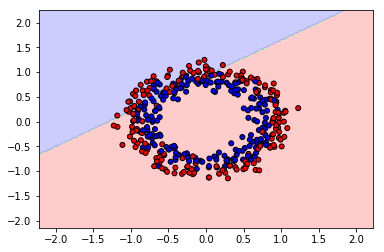

In [7]:
plot_decision_boundary(model, X, y, cmap=cmap_light)
plot_data(X, y)
plt.show()

In [8]:
lr = 0.1
n_iter = 1000
print_verbose = 100

loss = Softmax()
optimizer = SGD(lr)

model = NeuralNet(loss, optimizer)

So let's build a new network and add non-linearity this time. We will use the same data as before and after that we will see some others as well.

In [9]:
model.add(Dense(n, 16))
model.add(ReLU())
model.add(Dense(16, 32))
model.add(ReLU())
model.add(Dense(32, num_classes))

Iteration : 0, Loss : 0.6989010661893851
Iteration : 100, Loss : 0.39035303365218216
Iteration : 200, Loss : 0.37548644149430577
Iteration : 300, Loss : 0.36977301899488463
Iteration : 400, Loss : 0.3636964893311382
Iteration : 500, Loss : 0.35891320720740577
Iteration : 600, Loss : 0.35519267017880385
Iteration : 700, Loss : 0.35097331548979
Iteration : 800, Loss : 0.3488918620595899
Iteration : 900, Loss : 0.3454310743872171


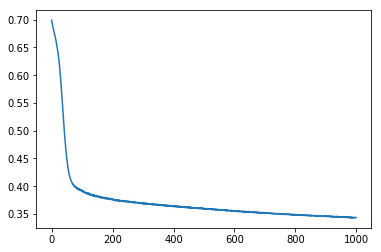

In [10]:
losses = model.train(X, y, n_iter=n_iter, print_verbose=print_verbose)
plt.plot(np.arange(n_iter), losses);

In [11]:
preds = model.predict(X)
(preds == y).mean()

0.855

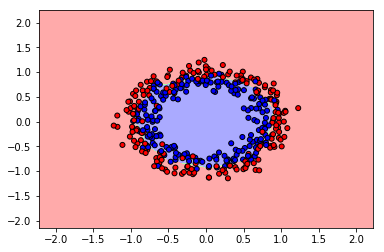

In [12]:
plot_decision_boundary(model, X, y, cmap=cmap_light, alpha=1)
plot_data(X, y)
plt.show()

Unsuprisingly, our network achieved something useful this time. We can see that it's no longer trying to seperate the data with line. 

### Make Blobs

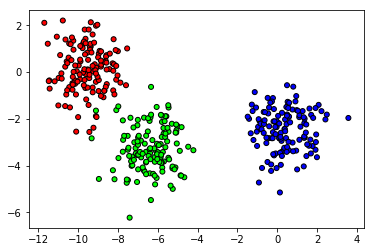

In [13]:
X, y = make_blobs(n_samples=400)
plot_data(X, y)

In [14]:
model = NeuralNet(loss, optimizer)

In [15]:
model.add(Dense(n, 16))
model.add(ReLU())
model.add(Dense(16, 16))
model.add(ReLU())
model.add(Dense(16, 3))

Iteration : 0, Loss : 0.594814995742958
Iteration : 100, Loss : 0.044132457594336184
Iteration : 200, Loss : 0.03154905072110227
Iteration : 300, Loss : 0.02589129819335744
Iteration : 400, Loss : 0.021055346557348975
Iteration : 500, Loss : 0.017576906584296784
Iteration : 600, Loss : 0.015043042419454235
Iteration : 700, Loss : 0.011914861523531457
Iteration : 800, Loss : 0.01149444923118633
Iteration : 900, Loss : 0.009244376186199534


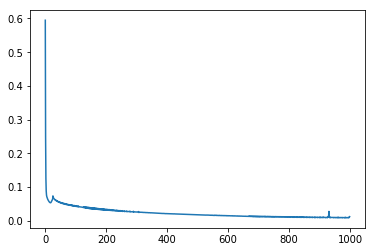

In [16]:
losses = model.train(X, y, n_iter=1000, print_verbose=100)
plt.plot(np.arange(1000), losses);

In [17]:
preds = model.predict(X)
(preds == y).mean()

0.9875

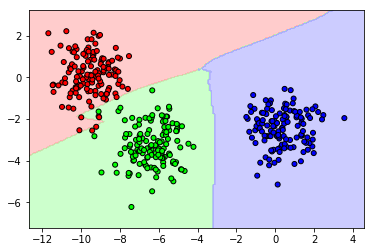

In [18]:
plot_decision_boundary(model, X, y, cmap=cmap_light)
plot_data(X, y)

### Make Moons

In [19]:
X, y = make_moons(200, noise=0.15)

In [20]:
model = NeuralNet(loss, optimizer)

model.add(Dense(2, 16))
model.add(ReLU())
model.add(Dense(16, 32))
model.add(ReLU())
model.add(Dense(32, 2))

Iteration : 0, Loss : 0.6101441777198324
Iteration : 100, Loss : 0.1293254301801595
Iteration : 200, Loss : 0.028703686772052435
Iteration : 300, Loss : 0.020106466279415192
Iteration : 400, Loss : 0.015408795331549652
Iteration : 500, Loss : 0.011941794666836175
Iteration : 600, Loss : 0.00943871262609082
Iteration : 700, Loss : 0.007675486101783767
Iteration : 800, Loss : 0.006061652667513353
Iteration : 900, Loss : 0.005086322151766562


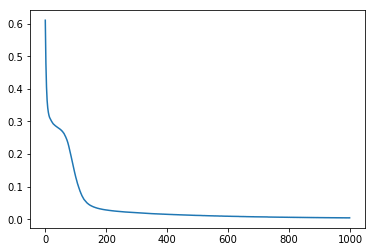

In [21]:
losses = model.train(X, y, n_iter=1000, print_verbose=100)
plt.plot(np.arange(1000), losses);

In [22]:
preds = model.predict(X)
(preds == y).mean()

1.0

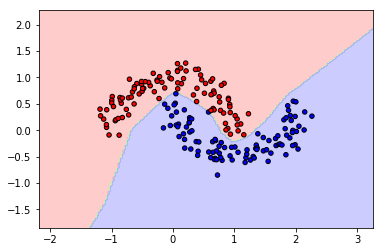

In [23]:
plot_decision_boundary(model, X, y, cmap=cmap_light)
plot_data(X, y, s=20)
plt.show()

After bunch of experiments we saw that why do we need activation functions in neural networks. I hope this notebook was useful for you. Have a nice day!